# Tutorial 7 - Detección de bordes y segmentación de imágenes

En este tutorial veremos

- Detección de bordes (LoG y Canny)
- Detección de regiones (MSER)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

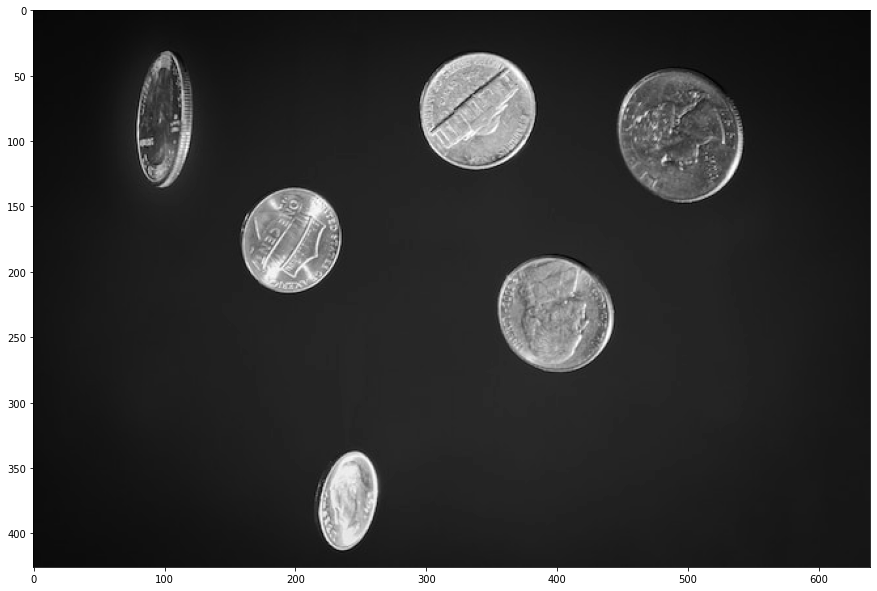

In [2]:
coins_gray = cv2.imread('coins.jpeg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.imshow(coins_gray, cmap='gray')

# Detección de bordes

## Laplaciano

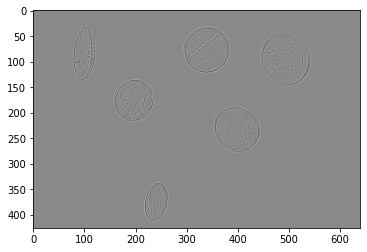

In [3]:
lap = cv2.Laplacian(coins_gray, cv2.CV_16S, ksize=3)
plt.imshow(lap, cmap='gray')

In [4]:
lap.dtype

dtype('int16')

In [5]:
coins_gray.dtype

dtype('uint8')

In [6]:
def get_zero_crossings(laplacian, thr):
    filter = np.array([[1, 0, -1]])
    clipped_lap = lap.clip(-thr, thr)
    zero_crossing_x = np.absolute(cv2.filter2D(clipped_lap, -1, filter)) >= thr
    zero_crossing_y = np.absolute(cv2.filter2D(clipped_lap, -1, filter.T)) >= thr
    zero_crossings = zero_crossing_x | zero_crossing_y
    return zero_crossings

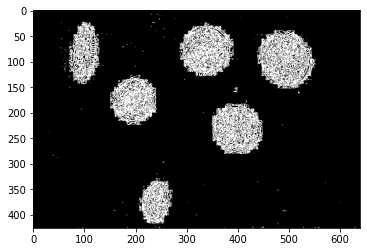

In [7]:
lap_zero_crossings = get_zero_crossings(lap, thr=11)
plt.imshow(lap_zero_crossings, cmap='gray')

## LoG

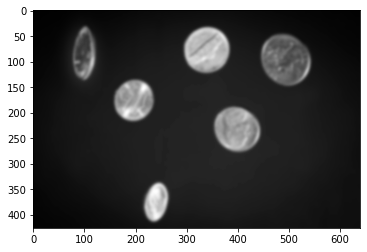

In [8]:
smoothed_coins = cv2.GaussianBlur(coins_gray, (15, 15), 0)
plt.imshow(smoothed_coins, cmap='gray')

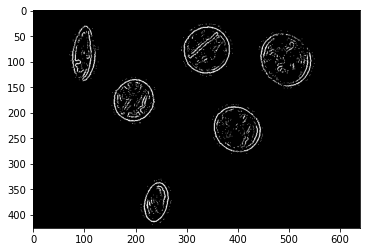

In [9]:
lap = cv2.Laplacian(smoothed_coins, cv2.CV_16S, ksize=3)
log_zero_crossings = get_zero_crossings(lap, thr=11)
plt.imshow(log_zero_crossings, cmap='gray')

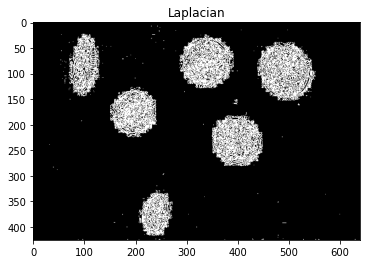

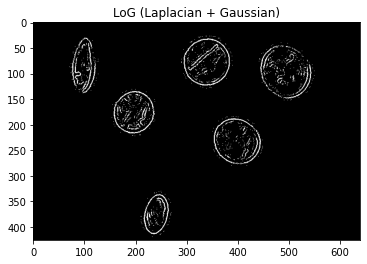

In [10]:
plt.title('Laplacian')
plt.imshow(lap_zero_crossings, cmap='gray')
plt.show()

plt.title('LoG (Laplacian + Gaussian)')
plt.imshow(log_zero_crossings, cmap='gray')
plt.show()

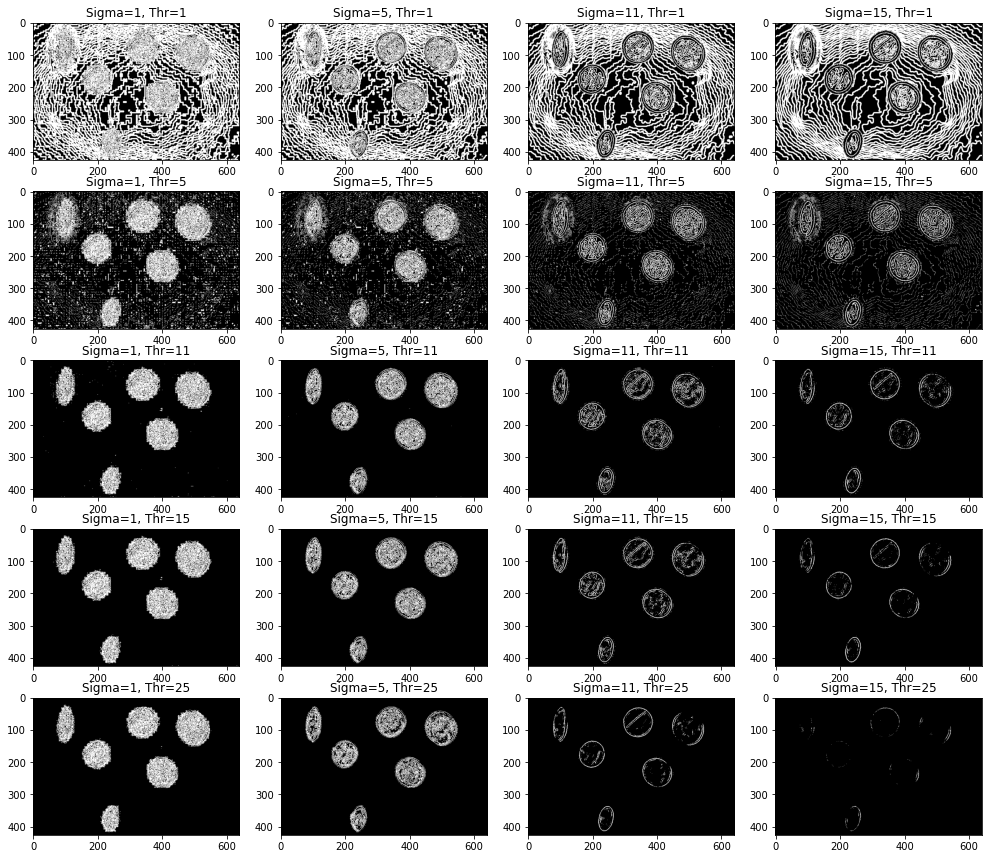

In [11]:
sigmas = (1, 5, 11, 15)
thresholds = (1, 5, 11, 15, 25)

fig, axes = plt.subplots(nrows=len(thresholds), ncols=len(sigmas), figsize=(17, 15))
for i, thr in enumerate(thresholds):
    for j, sigma in enumerate(sigmas):
        smoothed_coins = cv2.GaussianBlur(coins_gray, (sigma, sigma), 0)
        lap = cv2.Laplacian(smoothed_coins, cv2.CV_16S, ksize=3)
        log_zero_crossings = get_zero_crossings(lap, thr=thr)
        axes[i,j].set_title(f'Sigma={sigma}, Thr={thr}')
        axes[i,j].imshow(log_zero_crossings, cmap='gray')

## Canny (sin Gaussian)

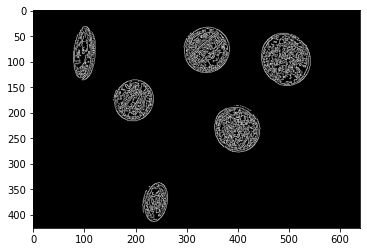

In [12]:
canny = cv2.Canny(coins_gray, threshold1=50, threshold2=100)
plt.imshow(canny, cmap='gray')

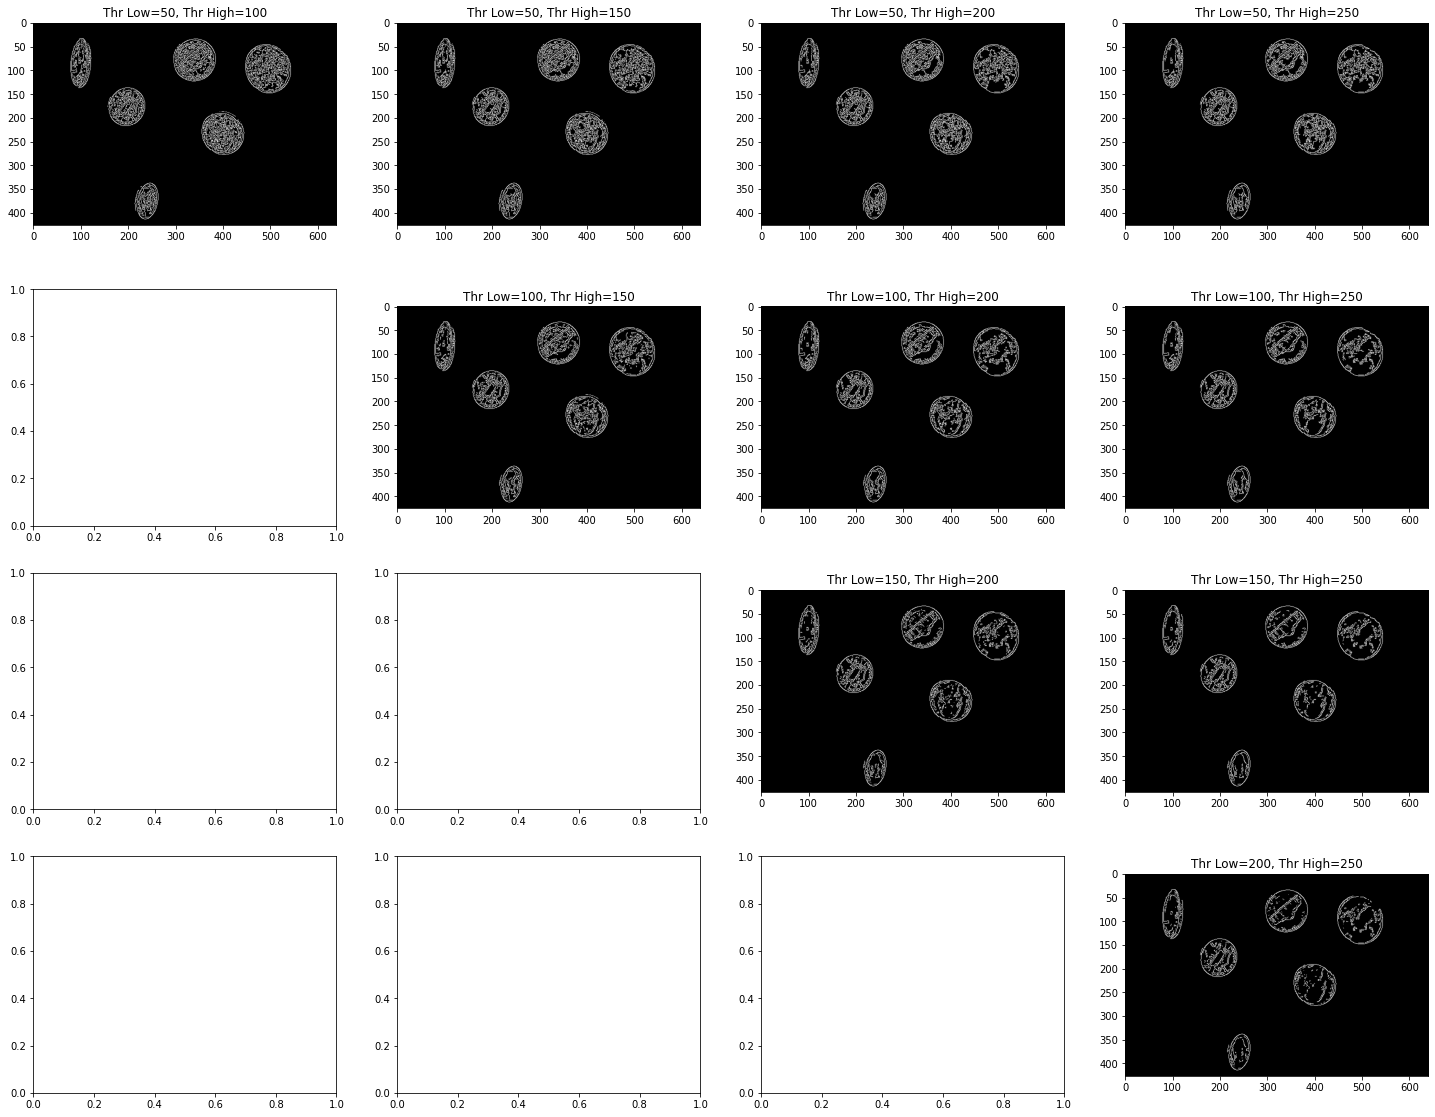

In [13]:
thresholds = (50, 100, 150, 200, 250)

fig, axes = plt.subplots(nrows=len(thresholds)-1, ncols=len(thresholds)-1, figsize=(25, 20))
for i, thr_low in enumerate(thresholds[:-1]):
    for j, thr_high in enumerate(thresholds[i+1:]):
        canny = cv2.Canny(coins_gray, threshold1=thr_low, threshold2=thr_high)
        axes[i,i+j].set_title(f'Thr Low={thr_low}, Thr High={thr_high}')
        axes[i,i+j].imshow(canny, cmap='gray')

## Canny (con Gaussian)

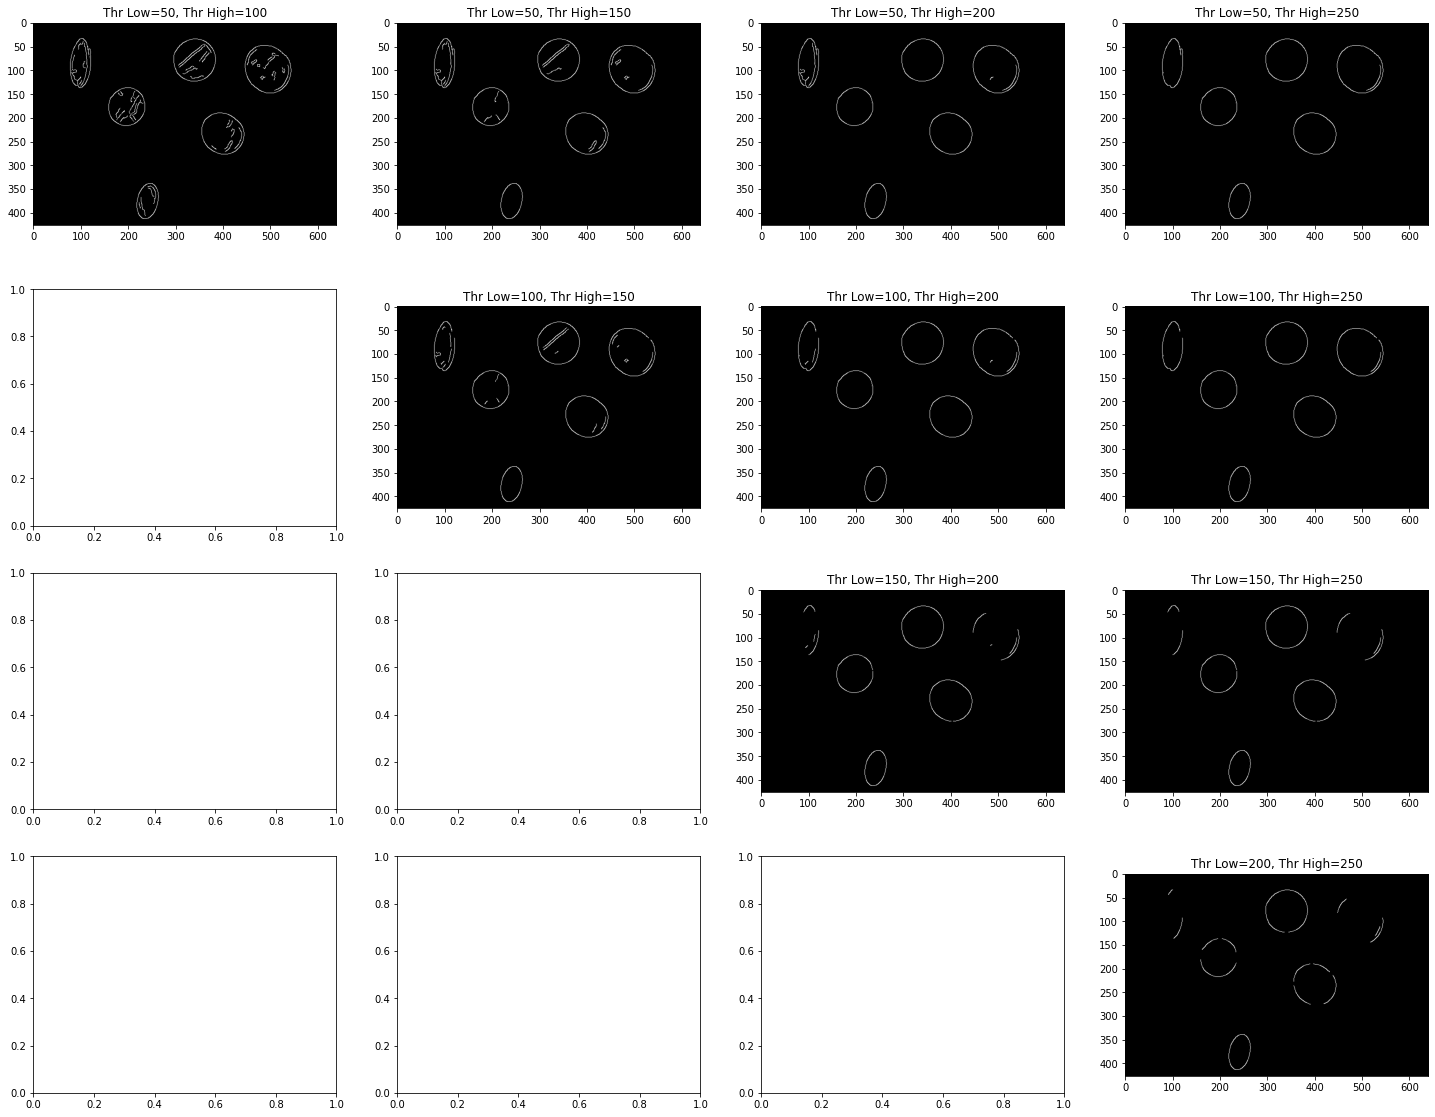

In [14]:
smoothed_coins = cv2.GaussianBlur(coins_gray, (11, 11), 0)

thresholds = (50, 100, 150, 200, 250)

fig, axes = plt.subplots(nrows=len(thresholds)-1, ncols=len(thresholds)-1, figsize=(25, 20))
for i, thr_low in enumerate(thresholds[:-1]):
    for j, thr_high in enumerate(thresholds[i+1:]):
        canny = cv2.Canny(smoothed_coins, threshold1=thr_low, threshold2=thr_high)
        axes[i,i+j].set_title(f'Thr Low={thr_low}, Thr High={thr_high}')
        axes[i,i+j].imshow(canny, cmap='gray')

# Detección de regiones

In [15]:
import skimage.measure
import skimage.morphology
import skimage.segmentation

# Creamos nuestro detector MSER
mser = cv2.MSER_create(
    min_area=100,
    max_area=40000,
)

In [16]:
# Detectamos las regiones
regions, bbox = mser.detectRegions(coins_gray)

In [17]:
len(regions)

157

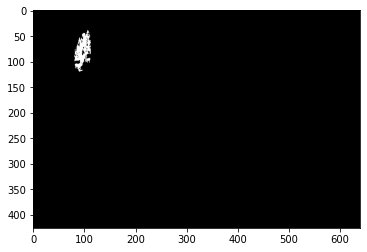

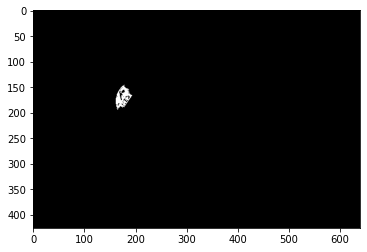

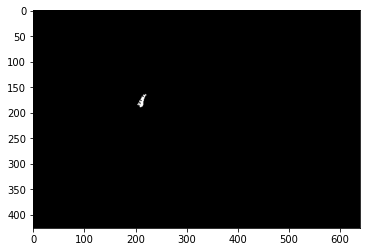

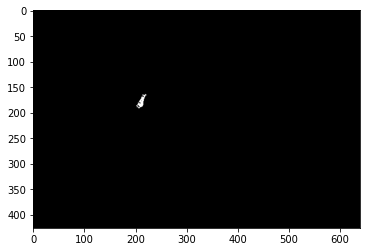

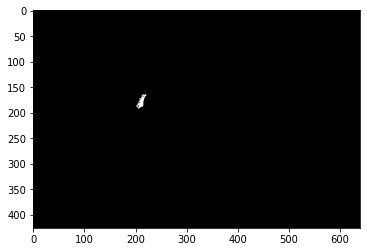

In [18]:
for region in regions[:5]: 
    mask_coins = np.zeros(coins_gray.shape)
    mask_coins[region[:,1], region[:,0]] = 1
    plt.imshow(mask_coins, cmap='gray')
    plt.show()

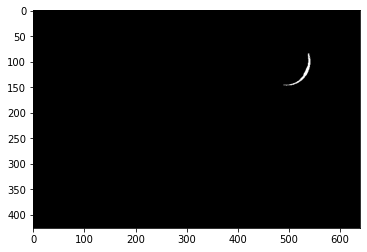

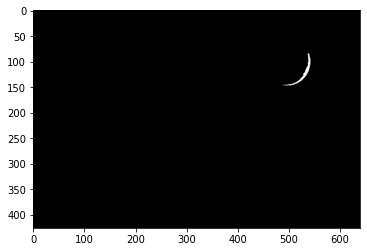

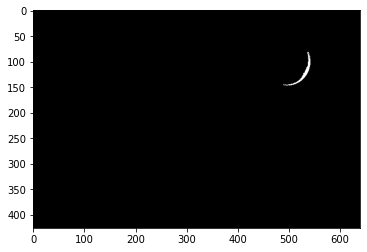

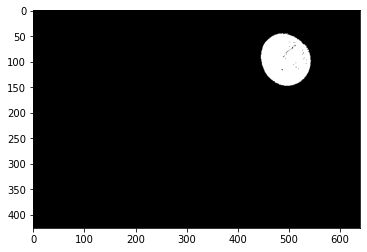

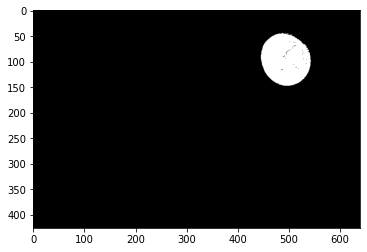

In [19]:
for region in regions[-5:]: 
    mask_pencilcase = np.zeros(coins_gray.shape)
    mask_pencilcase[region[:,1], region[:,0]] = 1
    plt.imshow(mask_pencilcase, cmap='gray')
    plt.show()

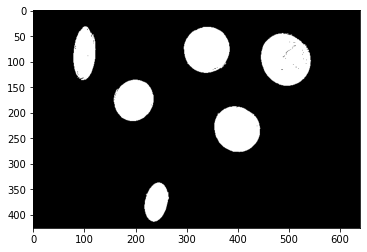

In [20]:
# Creamos una máscara con las regiones detectadas
mask_coins = np.zeros(coins_gray.shape)
for region in regions:
    mask_coins[region[:,1], region[:,0]] = 1
plt.imshow(mask_coins, cmap='gray')

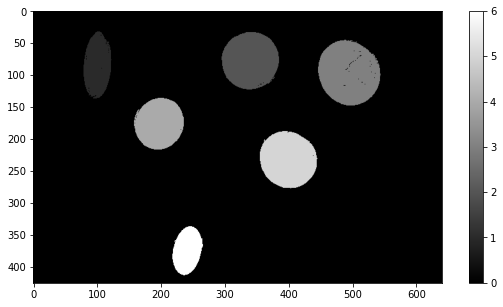

In [21]:
# Identificamos y etiquetamos los objetos individuales
label_regions = skimage.measure.label(mask_coins, connectivity=1)

plt.figure(figsize=(10, 5))
plt.imshow(label_regions, cmap='gray')
plt.colorbar()

In [22]:
num_coins = label_regions.max()

print(f'En la imagen hay {num_coins} monedas')

En la imagen hay 6 monedas
